In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [16]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [19]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [20]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [21]:
X=df.iloc[:,1:3]
Y =df.iloc[:,0]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


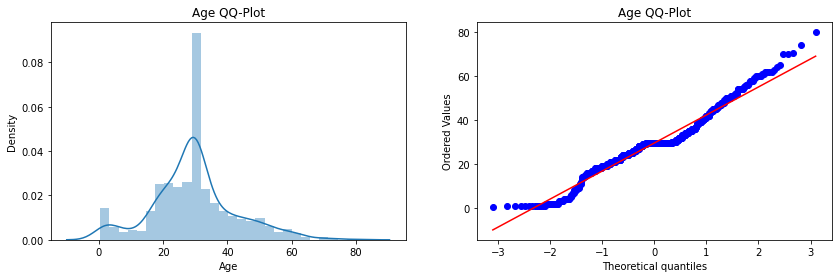

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age QQ-Plot')

plt.subplot(122)
stats.probplot(X_train['Age'], plot=plt)
plt.title('Age QQ-Plot')
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


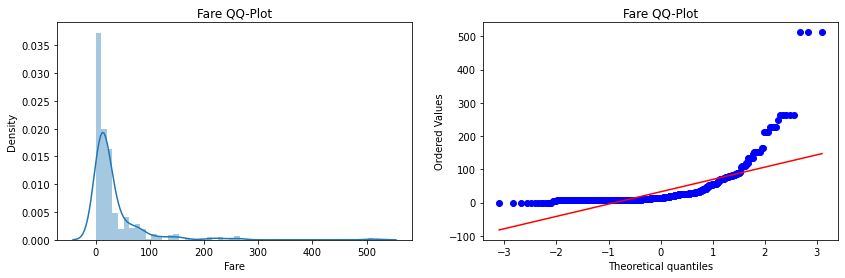

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare QQ-Plot')

plt.subplot(122)
stats.probplot(X_train['Fare'], plot=plt)
plt.title('Fare QQ-Plot')
plt.show()

In [34]:
# Apply models with out function transformer data 

In [38]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [40]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

print('Accuracy of logistic reg:',accuracy_score(y_test,y_pred))
print('Accuracy of Decision tree :',accuracy_score(y_test,y_pred2))

Accuracy of logistic reg: 0.6480446927374302
Accuracy of Decision tree : 0.6815642458100558


In [41]:
#apply function transform

trf=FunctionTransformer(func=np.log1p)

In [42]:
X_train_transform =trf.fit_transform(X_train)
X_trst_transform =trf.fit_transform(X_test)

In [43]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [45]:
clf.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

y_pred=clf.predict(X_trst_transform)
y_pred2=clf2.predict(X_trst_transform)

print('Accuracy of logistic reg:',accuracy_score(y_test,y_pred))
print('Accuracy of Decision tree :',accuracy_score(y_test,y_pred2))

Accuracy of logistic reg: 0.6815642458100558
Accuracy of Decision tree : 0.6759776536312849


In [47]:
X_transform =trf.fit_transform(X)

In [49]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()



print('Accuracy of logistic reg:',np.mean(cross_val_score(clf,
                                                         X_transform,Y,scoring='accuracy',cv=10)))

print('Accuracy of Decision tree:',np.mean(cross_val_score(clf2,
                                                         X_transform,Y,scoring='accuracy',cv=10)))

Accuracy of logistic reg: 0.678027465667915
Accuracy of Decision tree: 0.6577528089887641


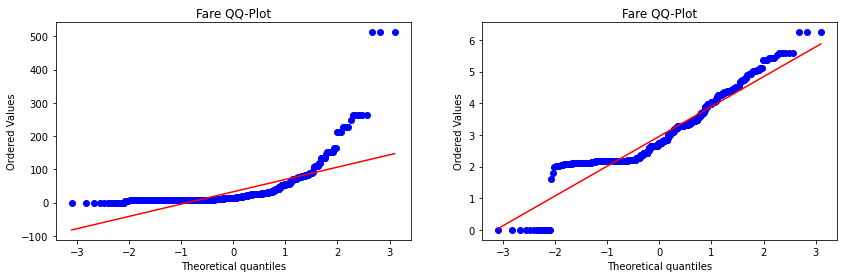

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], plot=plt)
plt.title('Fare QQ-Plot')


plt.subplot(122)
stats.probplot(X_train_transform['Fare'], plot=plt)
plt.title('Fare QQ-Plot')
plt.show()

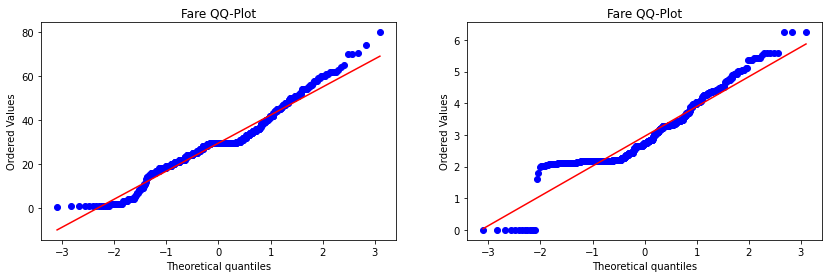

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], plot=plt)
plt.title('Before Fare QQ-Plot')


plt.subplot(122)
stats.probplot(X_train_transform['Fare'], plot=plt)
plt.title('After Fare QQ-Plot')
plt.show()